In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('avg_deaths.csv')

In [3]:
dt

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [4]:
date = pd.date_range('20200101',periods = 12,freq = 'M')


In [5]:
date

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [6]:
date = pd.Series(date)

In [7]:
date

0    2020-01-31
1    2020-02-29
2    2020-03-31
3    2020-04-30
4    2020-05-31
5    2020-06-30
6    2020-07-31
7    2020-08-31
8    2020-09-30
9    2020-10-31
10   2020-11-30
11   2020-12-31
dtype: datetime64[ns]

In [8]:
dt['days'] = date

In [9]:
dt

,Month,New_deaths,days
0,1,0,2020-01-31
1,2,0,2020-02-29
2,3,77,2020-03-31
3,4,1844,2020-04-30
4,5,1448,2020-05-31
5,6,785,2020-06-30
6,7,769,2020-07-31
7,8,1020,2020-08-31
8,9,739,2020-09-30
9,10,751,2020-10-31


In [10]:
dt['days'] = date.dt.days_in_month

In [11]:
dt

,Month,New_deaths,days
0,1,0,31
1,2,0,29
2,3,77,31
3,4,1844,30
4,5,1448,31
5,6,785,30
6,7,769,31
7,8,1020,31
8,9,739,30
9,10,751,31


In [12]:
dt.loc[11,'days'] = 15

In [13]:
dt

,Month,New_deaths,days
0,1,0,31
1,2,0,29
2,3,77,31
3,4,1844,30
4,5,1448,31
5,6,785,30
6,7,769,31
7,8,1020,31
8,9,739,30
9,10,751,31


In [14]:
dt['total_deaths'] = dt['New_deaths']*dt['days']

In [15]:
dt

,Month,New_deaths,days,total_deaths
0,1,0,31,0
1,2,0,29,0
2,3,77,31,2387
3,4,1844,30,55320
4,5,1448,31,44888
5,6,785,30,23550
6,7,769,31,23839
7,8,1020,31,31620
8,9,739,30,22170
9,10,751,31,23281


In [16]:
dt['cum_deaths'] = dt['total_deaths'].cumsum()

In [17]:
dt

,Month,New_deaths,days,total_deaths,cum_deaths
0,1,0,31,0,0
1,2,0,29,0,0
2,3,77,31,2387,2387
3,4,1844,30,55320,57707
4,5,1448,31,44888,102595
5,6,785,30,23550,126145
6,7,769,31,23839,149984
7,8,1020,31,31620,181604
8,9,739,30,22170,203774
9,10,751,31,23281,227055


In [18]:
c = dt['cum_deaths']

In [19]:
mar = c[2]
june = c[5]
oct = c[9]
dec = c[11]

In [20]:
months = [mar,june,oct,dec]
death = [round(month/dec,2)for month in months]

In [21]:
months

[2387, 126145, 227055, 297510]

In [24]:
vals = [round(0.5 + values * 0.3,3)for values in death]

In [25]:
vals

[0.503, 0.626, 0.728, 0.8]

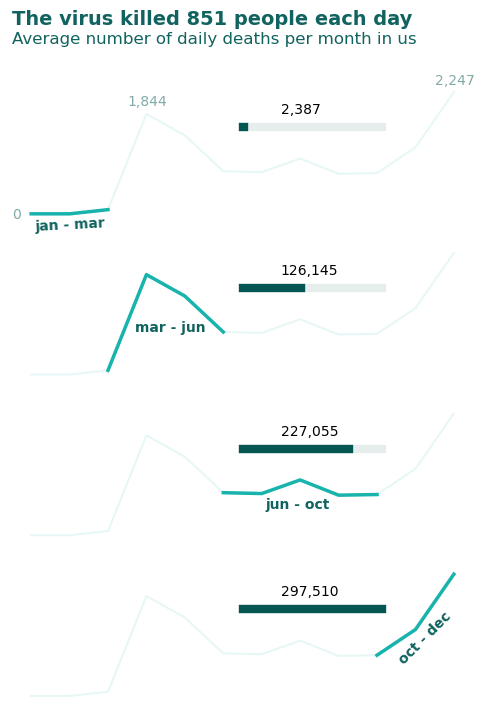

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dt['Month'],dt['New_deaths'],color = '#18B3AC',alpha = 0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(left = 0,bottom = 0)
    locs = ['left','right','top','bottom']
    for location in locs:
        ax.spines[location].set_visible(False)
ax1.plot(dt['Month'][:3],dt['New_deaths'][:3],color = '#18B3AC',linewidth = 2.5)   
ax2.plot(dt['Month'][2:6],dt['New_deaths'][2:6],color = '#18B3AC',linewidth = 2.5)        
ax3.plot(dt['Month'][5:10],dt['New_deaths'][5:10],color = '#18B3AC',linewidth = 2.5)        
ax4.plot(dt['Month'][9:12],dt['New_deaths'][9:12],color = '#18B3AC',linewidth = 2.5)  

ax1.text(0.5,-80,'0',alpha = 0.5,color = '#045652')
ax1.text(3.5,2000,'1,844',alpha = 0.5,color = '#045652')
ax1.text(11.5,2400,'2,247',alpha = 0.5,color = '#045652')

ax1.text(1.1,-300, 'jan - mar',color = '#11635F',weight = 'bold',rotation = 3)
ax2.text(3.7,800, 'mar - jun',color = '#11635F',weight = 'bold')
ax3.text(7.1,500,'jun - oct',color = '#11635F',weight = 'bold')
ax4.text(10.5,600,'oct - dec',color = '#11635F',weight = 'bold',rotation = 45)

ax1.text(0.5,3500,'The virus killed 851 people each day',size = 14 , weight = 'bold',color = '#11635F')
ax1.text(0.5,3150,'Average number of daily deaths per month in us',size = 12,color = '#11635F')

for ax,xmax,months in zip(axes,vals,months):
    ax.axhline(y = 1600,xmin = 0.5,xmax = 0.8,linewidth = 6,color = '#045652',alpha =0.1)
    ax.axhline(y = 1600,xmin = 0.5,xmax = xmax,linewidth = 6,color = '#045652')
    ax.text(7.5,1850,format(months,','))
plt.show()
